In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import QuantileTransformer

import wrangle

### Load your zillow dataset.


In [2]:
train, validate, test = wrangle.wrangle_zillow()
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,age
1219155,3,1.0,996,28116,1955,6037,67
543342,2,1.0,983,232817,1928,6037,94
1635508,4,2.0,1422,579000,1965,6059,57
1723313,3,2.5,1714,297912,1997,6111,25
1100678,3,2.0,1385,124672,1984,6037,38


### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [3]:
feat = ['calculatedfinishedsquarefeet']
target = ['taxvaluedollarcnt']

In [4]:
x = train[feat]
y = train[target]

In [5]:
baseline = y.mean().values[0]

In [6]:
# Create and fit the model to the train sample set

scaler = QuantileTransformer(output_distribution='normal')
scaler.fit(x)
# Transform each sample set
X = scaler.transform(x)

In [7]:
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

### Plot the residuals for the linear regression model that you made.

In [8]:
pd.DataFrame(X, index=y.index, columns=['scaled_sqft'])

,scaled_sqft
1219155,-1.371657
543342,-1.401177
1635508,-0.341493
1723313,0.134645
1100678,-0.411534
...,...
237859,-0.045180
232987,0.617047
785237,-1.100140
1608215,0.042668


In [9]:
predictions

array([[ 63931.8198127 ],
       [ 55405.53091385],
       [361477.84410295],
       ...,
       [142355.18171079],
       [472436.38636967],
       [641856.21306079]])

In [10]:
df = y.copy()
df.head()

,taxvaluedollarcnt
1219155,28116
543342,232817
1635508,579000
1723313,297912
1100678,124672


In [11]:
df['baseline'] = baseline
df['yhat'] = predictions
df['residual_baseline'] = df.taxvaluedollarcnt - baseline
df['residual_predict'] = df.taxvaluedollarcnt - df.yhat
df.head()

,taxvaluedollarcnt,baseline,yhat,residual_baseline,residual_predict
1219155,28116,460653.078289,63931.819813,-432537.078289,-35815.819813
543342,232817,460653.078289,55405.530914,-227836.078289,177411.469086
1635508,579000,460653.078289,361477.844103,118346.921711,217522.155897
1723313,297912,460653.078289,499002.221923,-162741.078289,-201090.221923
1100678,124672,460653.078289,341247.426509,-335981.078289,-216575.426509


In [12]:
df = pd.concat((df, pd.DataFrame(X, index=y.index, columns=['scaled_sqft'])), axis=1)

Text(0.5, 1.0, 'Predict')

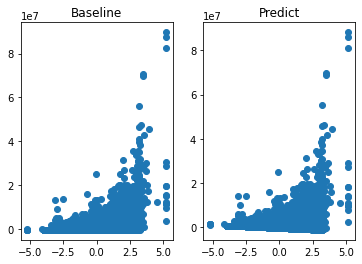

In [13]:
plt.subplot(1,2,1)
plt.scatter(df.scaled_sqft, df.residual_baseline)
plt.title('Baseline')

plt.subplot(1,2,2)
plt.scatter(df.scaled_sqft, df.residual_predict)
plt.title('Predict')

### 3.
Calculate the 
sum of squared errors,  
explained sum of squares,  
total sum of squares,  
mean squared error,  
and root mean squared error for your model.

- Sum of Squared Errors
    - (Residuals**2).sum()
- Explained sum of squares
    -  ((yhat-baseline)**2).sum()
- Total sum of squares
    - (Sum of Squared Errors) + (Explained Sum of Squares)
- Mean Squared Error
    - (Sum of Squared Errors)/(Count of Residuals)
- Root Mean Squared Error
    - $ \sqrt(Mean Squared Error) $ 

In [14]:
df= df.rename(columns={'taxvaluedollarcnt':'y', 'scaled_sqft':'x'})

In [15]:
df.head()

,y,baseline,yhat,residual_baseline,residual_predict,x
1219155,28116,460653.078289,63931.819813,-432537.078289,-35815.819813,-1.371657
543342,232817,460653.078289,55405.530914,-227836.078289,177411.469086,-1.401177
1635508,579000,460653.078289,361477.844103,118346.921711,217522.155897,-0.341493
1723313,297912,460653.078289,499002.221923,-162741.078289,-201090.221923,0.134645
1100678,124672,460653.078289,341247.426509,-335981.078289,-216575.426509,-0.411534


In [16]:
print('Sum of Sqared Errors:',(df.residual_predict**2).sum() )
print('Explained Sum of Squares:',((df.yhat-df.baseline)**2).sum() )
print('Total Sum of Squares:', (df.residual_predict**2).sum() + ((df.yhat-df.baseline)**2).sum()  )
print('Mean Squared Error:',  (df.residual_predict**2).sum()/len(df) )
import math
print('Root Mean Squared Error:',  math.sqrt((df.residual_predict**2).sum()/len(df)) )

Sum of Sqared Errors: 3.33868158144524e+17
Explained Sum of Squares: 7.082626415331833e+16
Total Sum of Squares: 4.0469442229784237e+17
Mean Squared Error: 389990069016.39777
Root Mean Squared Error: 624491.8486388735


### Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).



In [17]:
print('Sum of Sqared Errors:',(df.residual_baseline**2).sum() )
print('Explained Sum of Squares:',((df.baseline-df.baseline)**2).sum() )
print('Total Sum of Squares:', (df.residual_baseline**2).sum() + ((df.yhat-df.baseline)**2).sum()  )
print('Mean Squared Error:',  (df.residual_baseline**2).sum()/len(df) )
import math
print('Root Mean Squared Error:',  math.sqrt((df.residual_baseline**2).sum()/len(df)) )

Sum of Sqared Errors: 4.046944222978353e+17
Explained Sum of Squares: 0.0
Total Sum of Squares: 4.7552068645115366e+17
Mean Squared Error: 472721946769.6717
Root Mean Squared Error: 687547.7778086929


Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [18]:
print('Diffrence of SSE (Sum of Sqared Errors:',(df.residual_baseline**2).sum() - (df.residual_predict**2).sum() )

Diffrence of SSE (Sum of Sqared Errors: 7.08262641533113e+16


What is the amount of variance explained in your model?



In [19]:
explained_sum_of_squares = ((df.yhat-df.baseline)**2).sum()
sum_of_squared_errors = (df.residual_predict**2).sum()
total_sum_of_sqares = sum_of_squared_errors + explained_sum_of_squares
r2_variance = (explained_sum_of_squares / total_sum_of_sqares)
r2_variance

0.17501171316167147

In [20]:
from sklearn.metrics import r2_score
r2_score(df.y, df.yhat)

0.1750117131616571

Is your model better than the baseline model?



In [21]:
df.head()

,y,baseline,yhat,residual_baseline,residual_predict,x
1219155,28116,460653.078289,63931.819813,-432537.078289,-35815.819813,-1.371657
543342,232817,460653.078289,55405.530914,-227836.078289,177411.469086,-1.401177
1635508,579000,460653.078289,361477.844103,118346.921711,217522.155897,-0.341493
1723313,297912,460653.078289,499002.221923,-162741.078289,-201090.221923,0.134645
1100678,124672,460653.078289,341247.426509,-335981.078289,-216575.426509,-0.411534


In [22]:
r2_score(df.y,df.baseline)

0.0

Create a file named `evaluate.py` that contains the following functions.


 - plot_residuals(y, yhat): creates a residual plot  
 - regression_errors(y, yhat): returns the following values:  
     - sum of squared errors (SSE)
     - explained sum of squares (ESS)
     - total sum of squares (TSS)
     - mean squared error (MSE)
     - root mean squared error (RMSE)
 - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


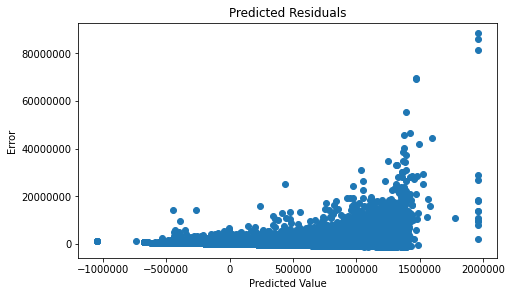

In [26]:
def plot_residuals(actual, predicted):
    ybar = actual.mean()
    yhat = predicted
    resid_p = actual - yhat
    resid_b = actual - ybar

    fig, ax1 = plt.subplots(1, 1, constrained_layout=True, sharey=True, figsize=(7,4))
    ax1.set_title('Predicted Residuals')
    ax1.set_ylabel('Error')
    ax1.set_xlabel('Predicted Value')
    ax1.ticklabel_format(useOffset=False, style='plain')

    ax1.scatter(x=yhat, y=resid_p)


plot_residuals(df.y, df.yhat)

 - regression_errors(y, yhat): returns the following values:  
     - sum of squared errors (SSE)
     - explained sum of squares (ESS)
     - total sum of squares (TSS)
     - mean squared error (MSE)
     - root mean squared error (RMSE)


In [31]:
def regression_errors(actual: pd.Series, predicted: pd.Series) -> dict:
    y = actual
    ybar = actual.mean()
    yhat = predicted
    resid_p = y - yhat
    resid_b = y - ybar
    
    sum_of_squared_errors = (resid_p**2).sum()
    explained_sum_of_squares = ((yhat-ybar)**2).sum()
    total_sum_of_sqares = sum_of_squared_errors + explained_sum_of_squares
    mean_squared_error = sum_of_squared_errors / len(y)
    root_mean_squared_error = math.sqrt(mean_squared_error)
    r2_variance = (explained_sum_of_squares / total_sum_of_sqares)

    error_metrics = {
        'SSE' : sum_of_squared_errors,
        'ESS' : explained_sum_of_squares,
        'TSS' : total_sum_of_sqares,
        'MSE' : mean_squared_error,
        'RMSE' : root_mean_squared_error,
        'r2' : r2_variance
    }

    return error_metrics

regression_errors(df.y, df.yhat)

{'SSE': 3.33868158144524e+17,
 'ESS': 7.082626415331833e+16,
 'TSS': 4.0469442229784237e+17,
 'MSE': 389990069016.39777,
 'RMSE': 624491.8486388735,
 'r2': 0.17501171316167147}

 - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [32]:
def baseline_mean_errors(actual):
    baseline = np.full_like(actual, actual.mean())
    return regression_errors(actual, baseline)

baseline_mean_errors(df.y)

{'SSE': 404694422297840591,
 'ESS': 5247.183757293086,
 'TSS': 4.046944222978458e+17,
 'MSE': 472721946769.67786,
 'RMSE': 687547.7778086973,
 'r2': 1.2965792133975297e-14}

In [33]:
def better_than_baseline(actual, predicted):
    p = regression_errors(actual, predicted)['RMSE']
    b = baseline_mean_errors(actual)['RMSE']
    return (p < b)

better_than_baseline(df.y, df.yhat)

True

In [36]:
len(train)+len(validate)+len(test), len(train)

(2140235, 856094)